In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# For Sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [2]:
cd ..

/Users/amandabuch/Documents/clusterCCA/PCMF


In [21]:
video_prefix='movies/TEST_path250_centered_'


In [4]:
def generate_PMD_data(m=100, n_X=10, sigma=1, density=0.5, mean=0, seed=1):
    "Generates data matrix for PCMF."
    np.random.seed(seed)
    u_star = np.random.randn(m) / 3.0
    v_star = np.random.randn(n_X) / 3.0
    X = np.random.normal(mean,sigma,size=((m,n_X))) / 3.0
    X_idxs = np.random.choice(range(n_X), int(density*n_X), replace=False)
    for idx in X_idxs:
        X[:,idx] += v_star[idx]*u_star

    return X, u_star, v_star

def generate_cluster_PMD_data(m=[50,50,20], n_X=20, sigma=0.075, density=1.0, n_clusters=3, 
                              means=[-0.35,0.2,0.35], gen_seeds=True, seeds=[], verbose=False):
    '''
    Generates multiple cluster data matrix for PCMF.
    '''
    X_out = []
    u_stars = []
    v_stars = []

    for nc in range(n_clusters):
        if gen_seeds is True:
            seed = np.random.randint(99999)
            seeds.append(seed)
            # print('generating seeds')                                                                                  
        # else:                                                                                                          
            # print(seeds)                                                                                               
            # print('NOT generating seeds')                                                                              

        if verbose == True:
            print(seeds)

        X, u_star, v_star = generate_PMD_data(m[nc], n_X, sigma, density, mean=means[nc], seed=seeds[nc])
        X_out.append(X)
        u_stars.append(u_star)
        v_stars.append(v_star)
    return X_out, u_stars, v_stars, seeds



In [5]:
from matplotlib import cm

def path_plot(coefficient_arr, penalty_list, plot_range=[0,-1], cut_vars=False, 
              first_vars_only=False, var_sel=1, true_clusters=None,figsize=(20,10), xticks=None):
    # Crop x axis (e.g, to remove 'burn-in' period at beginning)                                                         
    coefficient_arr = coefficient_arr[plot_range[0]:plot_range[1],:,:]
    penalty_list = penalty_list[plot_range[0]:plot_range[1]]
    if cut_vars is True:
        coefficient_arr = coefficient_arr[:,:,[1,2,coefficient_arr.shape[2]-1]]

    if first_vars_only is True:
        coefficient_arr = coefficient_arr[:,:,[var_sel]]

    # Colormap                                                                                                           
    cmap = matplotlib.cm.get_cmap('tab20b')

    #cm.get_cmap('viridis', coefficient_arr.shape[2])
    colors = cmap(np.linspace(0.0,1.0,3))
    
    # Define x-axis range                                                                                                
    penalty_range = range(len(penalty_list))

    # Make figure
    fig, ax = plt.subplots(1,1, figsize=figsize)

    for i in range(coefficient_arr.shape[2]):
        x = np.round(np.array(penalty_list),8)[penalty_range]
        y = coefficient_arr[penalty_range,:,i]
        if true_clusters is not None:
            # Make different line types for different clusters
            linetypes = ['dotted']*len(true_clusters)
            color_list = [colors[i]]*len(true_clusters)
            for j, tc in enumerate(true_clusters):
                if tc == 1:
                    linetypes[j] = 'solid'
                    color_list[j] = colors[tc]
                elif tc == 2:
                    linetypes[j] = 'dashed'
                    color_list[j] = colors[tc]
                elif tc == 3:
                    linetypes[j] = 'dashdot'
                    color_list[j] = colors[tc]
                else:
                    linetypes[j] = 'dotted'
                    color_list[j] = colors[tc]

            # Plot the lines and set linestyle
            ax.plot(np.arange(x.shape[0]), y, color=colors[i], alpha=0.5)
            for l, line in enumerate(ax.get_lines()):
                line.set_linestyle(linetypes[l])
                line.set_color(color_list[l])
        else:
            ax.plot(np.arange(x.shape[0]), y, color=colors[i], alpha=0.5)
        # Set plot ticks and labels
        ax.set_xticks(range(x.shape[0]), minor=False);
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        x = [str(xx)[0:9] for xx in x]
        ax.set_xticklabels(x) #,fontsize=24)
        evens = np.arange(0,len(ax.xaxis.get_ticklabels())+1,2)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) 
    ax.tick_params(axis='y') #, labelsize=24)
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('Coefficients',fontsize=16)
    sns.despine()
    
    
def path_plot_video(coefficient_arr, penalty_list, penalty_idx, fig, ax, plot_range=[0,-1], cut_vars=False, 
              first_vars_only=False, var_sel=1, true_clusters=None,figsize=(20,10), xticks=None):
    # Crop x axis (e.g, to remove 'burn-in' period at beginning)                                                         
    coefficient_arr = coefficient_arr[plot_range[0]:plot_range[1],:,:]
    penalty_list = penalty_list[plot_range[0]:plot_range[1]]
    if cut_vars is True:
        coefficient_arr = coefficient_arr[:,:,[1,2,coefficient_arr.shape[2]-1]]

    if first_vars_only is True:
        coefficient_arr = coefficient_arr[:,:,[var_sel]]

    # Colormap                                                                                                           
    cmap = matplotlib.cm.get_cmap('tab20b')

    #cm.get_cmap('viridis', coefficient_arr.shape[2])
    colors = cmap(np.linspace(0.0,1.0,3))
    
    # Define x-axis range                                                                                                
    penalty_range = range(len(penalty_list))

    # Make figure
#     fig, ax = plt.subplots(1,1, figsize=figsize)

    for i in range(coefficient_arr.shape[2]):
        x = np.round(np.array(penalty_list),8)[penalty_range]
        y = coefficient_arr[penalty_range,:,i]
        if true_clusters is not None:
            # Make different line types for different clusters
            linetypes = ['dotted']*len(true_clusters)
            color_list = [colors[i]]*len(true_clusters)
            for j, tc in enumerate(true_clusters):
                if tc == 1:
                    linetypes[j] = 'solid'
                    color_list[j] = colors[tc]
                elif tc == 2:
                    linetypes[j] = 'dashed'
                    color_list[j] = colors[tc]
                elif tc == 3:
                    linetypes[j] = 'dashdot'
                    color_list[j] = colors[tc]
                else:
                    linetypes[j] = 'dotted'
                    color_list[j] = colors[tc]

            # Plot the lines and set linestyle
            ax.plot(np.arange(x.shape[0]), y, color=colors[i], alpha=0.5)
            for l, line in enumerate(ax.get_lines()):
                line.set_linestyle(linetypes[l])
                line.set_color(color_list[l])
        else:
            ax.plot(np.arange(x.shape[0]), y, color=colors[i], alpha=0.5)
        # Set plot ticks and labels
        ax.set_xticks(range(x.shape[0]), minor=False);
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        x = [str(xx)[0:9] for xx in x]
        ax.set_xticklabels(x) #,fontsize=24)
        evens = np.arange(0,len(ax.xaxis.get_ticklabels())+1,2)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) 
    ax.tick_params(axis='y') #, labelsize=24)
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('Coefficients',fontsize=16)
    
    plt.plot([penalty_idx,penalty_idx],[-0.1,0.5],color='black')
    plt.locator_params(axis='x',nbins=25)
        
    sns.despine()

In [6]:
from scipy.sparse import csr_matrix
from itertools import combinations
import networkx as nx
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

def sparse_D(n,p):
    '''                                                                                                                  
    Construct a sparse matrix, that when applied to a vector containing concatenated vectors                             
    of coefficients b = [b_1 b_2 ... b_n] where each b_i is p=num_var long and there are                                 
    n = num_vec of them. Differences are taken between conformal elements (e.g. b_11 and b_21)                           
    across all unique pairwise combinations of vectors.                                                                  
    '''
    comb_list = list(combinations(range(n),2))
    combs_arr = np.array(comb_list)
    num_combs = combs_arr.shape[0]
    data = np.ones_like(combs_arr)
    data[:,1] *= -1
    row = np.repeat(range(num_combs),2)
    col = combs_arr.flatten()
    return csr_matrix((data.flatten(), (row, col)), shape=(num_combs, n)), comb_list

def diff_graph_cluster(Xhat, D, comb_list, num_clusters, thresh_sd=6, pca_clean=True, num_fits=1, verbose=False):
    '''
    Given a PCMF data approximation 'Xhat' for a fixed lambda and a differencing matrix 'D', calculate the 
    difference variable graph as suggested in Chi and Lange JCGC (2015), clustering on the graph adjacency 
    matrix (or a PCA embedding of it if pca_clean=True).
    
    Args:
        Xhat - PCMF data approximation at a fixed penalty parameter.
        D - a sparse differencing matrix given by 'sparse_D'.
        comb_list - the combination indices returned by 'sparse_D'.
        num_clusters - the number of clusters.
        thresh_sd - a threshold standard deviation cuttoff for thresholding the difference graph.
        pca_clean - boolean; should the PCA of the adjacency matrix be used for clustering. 
        num_fits - number of spectral clusterings to take the median of for output. 
        verbose - Print threshold adjustment; plot histogram graph edges and show GMM fit used to choose threshold.

    '''
    # Get graph edges from distances, and estimate graph threshold from edge mode centered around zero
    edges = np.sum(D*Xhat,axis=1)
    #edges = np.median(D*Xhat,axis=1)

    gmm = GaussianMixture(n_components = 6, max_iter=200, n_init=10).fit(edges.reshape(-1, 1))
    zero_mode_idx = np.where(np.abs(gmm.means_)==np.min(np.abs(gmm.means_)))[0]
    thresh = thresh_sd*np.sqrt(gmm.covariances_[zero_mode_idx])
    
    # Make adjacency from sum of differences (and adjust threshold if necessary) 
    flag = True
    while flag==True:
        # Generate graph
        G = nx.Graph()
        for i,e in enumerate(edges):
            if np.abs(e) < thresh:
                G.add_edge(comb_list[i][0], comb_list[i][1])
        A = nx.adjacency_matrix(G).toarray()
        if verbose:
            print('threshold:',thresh)
        if A.shape[0] < Xhat.shape[0]:
            thresh *= 1.1
        else:
            flag = False
            
    # Apply spectral clustering, taking median of 'num_fits' tryes to get output labels
    out_labels = []
    for f in range(num_fits):
        # Use PCA of A if 'pca_clean' flag set
        if pca_clean:
            uA, sA, vhA = np.linalg.svd(A)
            spectral_clustering = SpectralClustering(n_clusters=num_clusters, random_state=20, affinity="nearest_neighbors").fit(uA[:,0:num_clusters])
            out_labels.append(spectral_clustering.labels_)
        else:
            spectral_clustering = SpectralClustering(n_clusters=num_clusters, random_state=20, affinity="nearest_neighbors").fit(A)
            out_labels.append(spectral_clustering.labels_)
            
    # Plot thresholding histogram if 'plot_thresh_hist' is true
    if verbose:
        plt.figure(figsize=(10,5))
        _ = plt.hist(edges,bins=100,density=True)

        f_axis = edges.copy().ravel()
        f_axis.sort()
        a = []
        for weight, mean, covar in zip(gmm.weights_, gmm.means_, gmm.covariances_):
            a.append(weight*norm.pdf(f_axis, mean, np.sqrt(covar)).ravel())
            plt.plot(f_axis, a[-1])
        plt.plot(f_axis, np.array(a).sum(axis=0), 'k-')
        plt.xlabel('Variable')
        plt.ylabel('PDF')
        plt.tight_layout()
        plt.show()
        
    return np.median(np.array(out_labels),axis=0)



In [7]:
### Cluster matching ###

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linprog
from scipy.optimize import linear_sum_assignment as linear_assignment


def cluster_matching(pred, true):
    'New function for hungrarian matching clusters'
    from sklearn.metrics import confusion_matrix, accuracy_score
    from scipy.optimize import linprog
    from scipy.optimize import linear_sum_assignment as linear_assignment
    def _make_cost_m(cm):
        s = np.max(cm)
        return (- cm + s)
    conf_mat = confusion_matrix(pred,true)
    indexes = linear_assignment(_make_cost_m(conf_mat))

    pred_new = np.copy(pred)
    for clusterN in range(len(np.unique(pred))):
        pred_new[pred==clusterN]= indexes[1][clusterN]

    return pred_new


## Generate data

In [11]:
# Set data generation parameters
m = [100,20,20]
n_X = 20
sigma = 0.08
density = 1.0
n_clusters = 3
means = [-0.35, 0.0, 0.35]
true_clusters = np.repeat([0,1,2],m)

# Generate clusters
X_clusters, u_true, v_true, _ = generate_cluster_PMD_data(m, n_X, sigma, density, 
                                                          n_clusters=n_clusters, means=means, seeds=[1]) #8# row 1,3

# Add random intercept to one cluster and stack into data matrix
X_clusters[0] += 0.4
#X_clusters[0] += 0.3*np.random.randn(n_X)
X_c = np.vstack(X_clusters)

D, comb_list = sparse_D(X_c.shape[0],X_c.shape[1])


In [12]:
num_clusters = 3
num_components = 4
colors = ['darkblue','darkorange','red','green','purple']
plot_idxs = [0,1]
scatter_cmap = 'tab20b'
scatter_alpha = 0.3

(-0.5, 139.5, 139.5, -0.5)

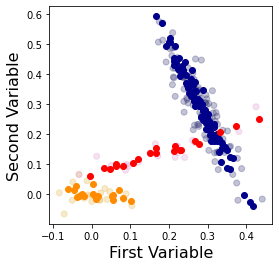

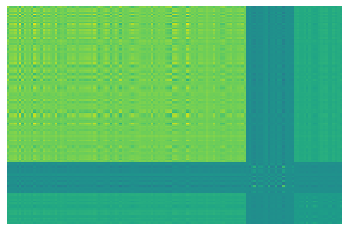

In [13]:
# Plot clusters
plt.figure(figsize=(4,4))
plt.scatter(X_c[:,plot_idxs[0]],X_c[:,plot_idxs[1]], c=true_clusters, cmap=scatter_cmap, alpha=scatter_alpha)
# plt.xlim(-0.5, 0.65)
# plt.ylim(-0.2, 0.65)
plt.xlabel('First Variable',fontsize=16)
plt.ylabel('Second Variable',fontsize=16)

# Plot PCA approximation with num_components components
X_pcas = list()
for ncl in range(num_clusters):
    idx = np.where(true_clusters==ncl)[0]
    u,d,vh = np.linalg.svd(X_c[idx,:], full_matrices=False)
    X_pca = np.dot(np.dot(u[:,0:num_components],np.diag(d[0:num_components])),vh[0:num_components,:])
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[ncl])

# Plot Covariance
plt.figure()
C = np.dot(X_c,X_c.T)
maxval = np.max(np.abs(C))
plt.imshow(C,aspect='auto',interpolation='nearest',cmap='viridis',vmin=-1*maxval, vmax=maxval)  
plt.axis('off')



### Run PCMF Full

In [14]:
penalty_list = np.concatenate((np.repeat(np.inf,10),np.exp(np.linspace(-20,5,250))[::-1]),axis=0)


In [15]:
from pcmf import pcmf_full, pcmf_approx_uV, plot_ordercolor, plot_cluster_assignments

gc = 2.0 

# Fit full model
A_list, U_list, s_list, V_list = pcmf_full(X_c, penalty_list, problem_rank=num_components, rho=1.0, numba=True, gauss_coef=gc, weights='Gaussian', admm_iters = 10, neighbors=25)



weights: Gaussian neighbors: 25 gauss_coef: 2.0 rho: 1.0
[ 1 ] inf...

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[ 2 ] inf...[ 3 ] inf...[ 4 ] inf...[ 5 ] inf...[ 6 ] inf...[ 7 ] inf...[ 8 ] inf...[ 9 ] inf...[ 10 ] inf...[ 11 ] 1.48413e+02...[ 12 ] 1.34236e+02...[ 13 ] 1.21413e+02...[ 14 ] 1.09815e+02...[ 15 ] 9.93246e+01...[ 16 ] 8.98366e+01...[ 17 ] 8.12548e+01...[ 18 ] 7.34929e+01...[ 19 ] 6.64724e+01...[ 20 ] 6.01226e+01...[ 21 ] 5.43793e+01...[ 22 ] 4.91847e+01...[ 23 ] 4.44863e+01...[ 24 ] 4.02367e+01...[ 25 ] 3.63930e+01...[ 26 ] 3.29166e+01...[ 27 ] 2.97722e+01...[ 28 ] 2.69282e+01...[ 29 ] 2.43558e+01...[ 30 ] 2.20292e+01...[ 31 ] 1.99249e+01...[ 32 ] 1.80215e+01...[ 33 ] 1.63000e+01...[ 34 ] 1.47429e+01...[ 35 ] 1.33346e+01...[ 36 ] 1.20608e+01...[ 37 ] 1.09087e+01...[ 38 ] 9.86661e+00...[ 39 ] 8.92410e+00...[ 40 ] 8.07161e+00...[ 41 ] 7.30057e+00...[ 42 ] 6.60317e+00...[ 43 ] 5.97240e+00...[ 44 ] 5.40188e+00...[ 45 ] 4.88586e+00...[ 46 ] 4.41913e+00...[ 47 ] 3.99699e+00...[ 48 ] 3.61518e+00...[ 49 ] 3.26983e+00...[ 50 ] 2.95748e+00...[ 51 ] 2.67496e+00...[ 52 ] 2.41944e+00...[ 53 ] 2.

In [16]:
# Cluster along path and match labels to reduce flipping
cluster_pcmfs = []
for i in range(len(penalty_list)):
    cluster_pcmf = diff_graph_cluster(np.array(A_list[i]), D, comb_list, num_clusters).astype(int)
    cluster_pcmfs.append(cluster_pcmf)
    

cluster_pcmfs_new = []
for idx in range(0,len(cluster_pcmfs)):
    cluster_pcmfs_new.append( cluster_matching(cluster_pcmfs[idx], true_clusters ) )



### Run PCMF PALS

In [17]:
from pcmf import pcmf_full, pcmf_approx_uV, plot_ordercolor, plot_cluster_assignments

gc = 2.0 

# Fit partial u,V model
V_list_approx_uV, u_list_approx_uV, s_list_approx_uV =  pcmf_approx_uV(X_c, penalty_list, rho=1.5, numba=True, gauss_coef=gc, weights='Gaussian', admm_iters = 5, neighbors=15)


weights: Gaussian neighbors: 15 gauss_coef: 2.0 rho: 1.5
[ 1 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 2 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 3 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 4 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 5 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 6 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 7 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 8 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 9 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 10 ] inf...PCMF subproblem is not defined for single cluster u, using PMD subproblem.
[ 11 ] 1.48413e+02...[ 12 ] 1.34236e+02...[ 13 ] 1.21413e+02...[ 14 ] 1.

In [19]:
Apals_list = []
spals_list = []
for p in range(len(penalty_list)):
    spals_list.append(u_list_approx_uV[p].T@X_c@V_list_approx_uV[p].T)
    x_pcmf = []
    for i in range(X_c.shape[0]):
        x_pcmf.append(np.dot(np.dot(u_list_approx_uV[p][i,:],spals_list[p][:,i]),V_list_approx_uV[p][i,:]))
    Apals_list.append(x_pcmf)

    
cluster_pcmfs_pals = []
for i in range(len(penalty_list)):
    cluster_pcmf_pals = diff_graph_cluster(np.array(Apals_list[i]), D, comb_list, num_clusters).astype(int)
    cluster_pcmfs_pals.append(cluster_pcmf_pals)
    

cluster_pcmfs_pals_new = []
for idx in range(0,len(cluster_pcmfs_pals)):
    cluster_pcmfs_pals_new.append( cluster_matching(cluster_pcmfs_pals[idx], true_clusters ) )




### Plots / videos

#### Plot paths

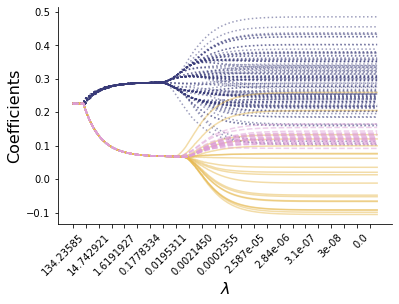

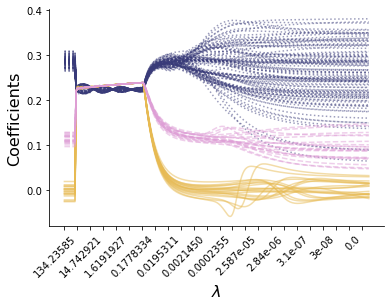

In [23]:
# Plot paths
import matplotlib
import seaborn as sns
path_plot(np.asarray(A_list)[:,:,6:7], penalty_list, plot_range=[0,len(penalty_list)],
          cut_vars=False, true_clusters=true_clusters,figsize=(6,4), 
          xticks=['134.2', '14.7' '1.6','0.2','0.02','0.002','0.0002','2.6e-5','2.5e-6','3.1e-7','3.0e-8','0.0']) 

plt.locator_params(axis='x',nbins=25)


path_plot(np.asarray(Apals_list)[:,:,6:7], penalty_list, plot_range=[0,len(penalty_list)],
          cut_vars=False, true_clusters=true_clusters,figsize=(6,4), 
          xticks=['134.2', '14.7' '1.6','0.2','0.02','0.002','0.0002','2.6e-5','2.5e-6','3.1e-7','3.0e-8','0.0']) 

plt.locator_params(axis='x',nbins=25)

### Generate videos

In [25]:
print('video_prefix',video_prefix)

video_prefix movies/TEST_path250_centered_


#### Video of PCMF full path + X scatter plot

First figure


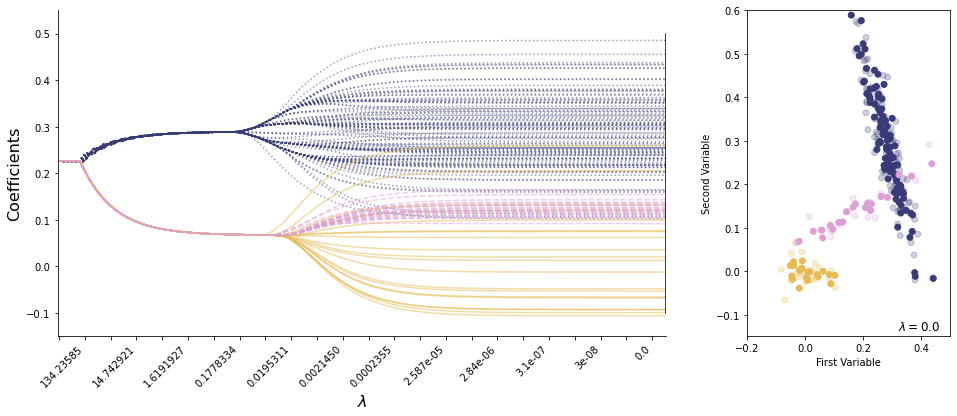

In [26]:
import seaborn as sns

# Generate video of solutions along path
print('First figure')
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

Xhat_list = []
for i in range(len(penalty_list)):
    Xhat_list.append(np.dot(np.dot(U_list[i],np.diag(s_list[i])),V_list[i])) 

# Make videos
fig = plt.figure(figsize=(16,6))
l = plt.scatter([], [])

# plt.xlim(-0.5, 0.65)
# plt.ylim(-0.2, 0.65)

ax=fig.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

with writer.saving(fig, video_prefix+"pcmf_full_"+"pathAndPlot.mp4", 300):
    for penalty_idx in range(len(penalty_list)):
        fig.clear()    
        ax = fig.add_subplot(gs[0], autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        path_plot_video(np.asarray(A_list)[:,:,6:7], penalty_list, penalty_idx, fig, ax, plot_range=[0,len(penalty_list)],
          cut_vars=False, true_clusters=true_clusters,figsize=(12,4), 
          xticks=['134.2', '14.7' '1.6','0.2','0.02','0.002','0.0002','2.6e-5','2.5e-6','3.1e-7','3.0e-8','0.0']) 
        plt.ylim(-0.15, 0.55)
        
        ax = fig.add_subplot(gs[1], autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        cluster_pcmf = cluster_pcmfs_new[penalty_idx]
        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(A_list)[penalty_idx,:,0],np.asarray(A_list)[penalty_idx,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
   
        writer.grab_frame()


#### Video of PCMF PALS path + X scatter plot

First figure


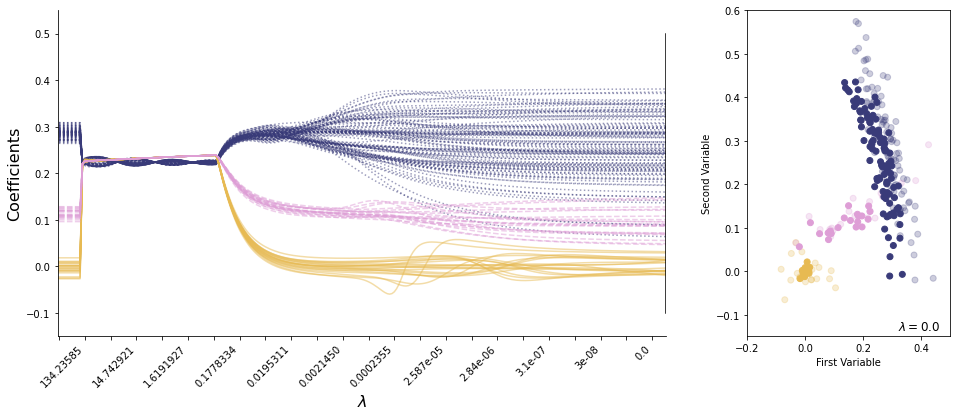

In [27]:
import seaborn as sns

# Generate video of solutions along path
print('First figure')
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

Xhat_list = []
for i in range(len(penalty_list)):
    Xhat_list.append(np.dot(np.dot(U_list[i],np.diag(s_list[i])),V_list[i])) 

# Make videos
fig = plt.figure(figsize=(16,6))
l = plt.scatter([], [])

# plt.xlim(-0.5, 0.65)
# plt.ylim(-0.2, 0.65)

ax=fig.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

with writer.saving(fig, video_prefix+"pcmf_pals_"+"pathAndPlot.mp4", 300):
    for penalty_idx in range(len(penalty_list)):
        fig.clear()    
        ax = fig.add_subplot(gs[0], autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        path_plot_video(np.asarray(Apals_list)[:,:,6:7], penalty_list, penalty_idx, fig, ax, plot_range=[0,len(penalty_list)],
          cut_vars=False, true_clusters=true_clusters,figsize=(12,4), 
          xticks=['134.2', '14.7' '1.6','0.2','0.02','0.002','0.0002','2.6e-5','2.5e-6','3.1e-7','3.0e-8','0.0']) 
        plt.ylim(-0.15, 0.55)
        
        ax = fig.add_subplot(gs[1], autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        cluster_pcmf = cluster_pcmfs_pals_new[penalty_idx]
        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(Apals_list)[penalty_idx,:,0],np.asarray(Apals_list)[penalty_idx,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
   
        writer.grab_frame()

#### PCMF Full X scatterplot video

First figure


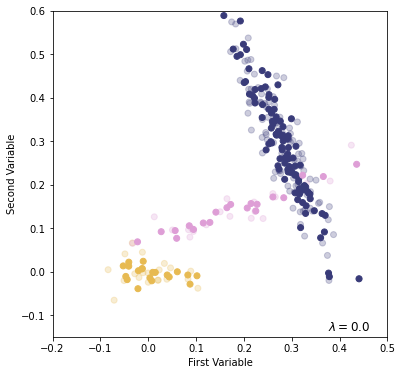

In [28]:
# Generate video of solutions along path
print('First figure')
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

Xhat_list = []
for i in range(len(penalty_list)):
    Xhat_list.append(np.dot(np.dot(U_list[i],np.diag(s_list[i])),V_list[i])) 

# Make videos
fig = plt.figure(figsize=(6,6))
l = plt.scatter([], [])

plt.xlim(-0.5, 0.65)
plt.ylim(-0.2, 0.65)

ax=fig.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


with writer.saving(fig, video_prefix+"pcmf_full_"+"stable_X.mp4", 300):
    for i in range(len(penalty_list)):
        fig.clear()
        ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))
#         cluster_pcmf = diff_graph_cluster(np.array(A_list[i]), D, comb_list, num_clusters).astype(int)
        cluster_pcmf = cluster_pcmfs_new[i]

        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(A_list)[i,:,0],np.asarray(A_list)[i,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
        

        writer.grab_frame()

        

#### PCMF PALS X scatter plot video

In [ ]:
# Generate video of solutions along path
print('First figure')
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

Xhat_list = []
for i in range(len(penalty_list)):
    Xhat_list.append(np.dot(np.dot(U_list[i],np.diag(s_list[i])),V_list[i])) 

# Make videos
fig = plt.figure(figsize=(6,6))
l = plt.scatter([], [])

plt.xlim(-0.5, 0.65)
plt.ylim(-0.2, 0.65)

ax=fig.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


with writer.saving(fig, video_prefix+"pcmf_pals_"+"stable_X.mp4", 300):
    for i in range(len(penalty_list)):
        fig.clear()
        ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        cluster_pcmf = cluster_pcmfs_pals_new[i]

        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(Apals_list)[i,:,0],np.asarray(Apals_list)[i,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
        

        writer.grab_frame()

        

First figure


#### PCMF Full and PALS X scatter plot video

In [ ]:
# Generate video of solutions along path
print('First figure')
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

Xhat_list = []
for i in range(len(penalty_list)):
    Xhat_list.append(np.dot(np.dot(U_list[i],np.diag(s_list[i])),V_list[i])) 

# Make videos
fig = plt.figure(figsize=(12,6))
l = plt.scatter([], [])

plt.xlim(-0.5, 0.65)
plt.ylim(-0.2, 0.65)

ax=fig.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

with writer.saving(fig, video_prefix+"pcmf_full-pals_"+"stable_X.mp4", 300):
    for i in range(len(penalty_list)):
        fig.clear()
        ax = fig.add_subplot(121, autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        cluster_pcmf = cluster_pcmfs_new[i]

        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(A_list)[i,:,0],np.asarray(A_list)[i,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
        
        ax = fig.add_subplot(122, autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

        cluster_pcmf = cluster_pcmfs_pals_new[i]

        ax.scatter(X_c[:,0],X_c[:,1],c=true_clusters, alpha=0.25, cmap=scatter_cmap)

        ax.scatter(np.asarray(Apals_list)[i,:,0],np.asarray(Apals_list)[i,:,1], c=cluster_pcmf, cmap=scatter_cmap)
        ax.set(xlabel="First Variable")
        ax.set(ylabel="Second Variable")
        ax.text(0.95, 0.01, r"$\lambda =$"+str(np.round(penalty_list[i],5)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=12)
        
        ax.set_xlim(-0.2, 0.5)
        ax.set_ylim(-0.15, 0.6)
        

        writer.grab_frame()

        